<a href="https://colab.research.google.com/github/viveknandakumar136/url/blob/main/version_2_URL_validator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
## Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from warnings import filterwarnings
from datetime import datetime
import re
import os
filterwarnings("ignore")

#Iteration
import itertools

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

#for Text Mining
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import WordNetLemmatizer
import nltk
from nltk.corpus import inaugural
from nltk.draw.dispersion import dispersion_plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,recall_score,precision_score

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 30


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [31]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
url_data = pd.read_csv("/content/drive/MyDrive/csic_ base training set .csv")
url_data

,URL,Flag
0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,0
1,http://localhost:8080/tienda1/publico/anadir.j...,0
2,http://localhost:8080/tienda1/publico/anadir.j...,0
3,http://localhost:8080/tienda1/publico/autentic...,0
4,http://localhost:8080/tienda1/publico/autentic...,0
...,...,...
1469,https://weco.oss-eu-central-1.aliyuncs.com/simple,1
1470,https://xhwja.office.enewlaw.com/merchantServices,1
1471,https://ykcxr.office.enewlaw.com/merchantServices,1
1472,http://bins/vcimanagement.powerpc,1


In [33]:
# # Function to extract subdomain and domain using regex
# def extract_full_domain(url):
#     # Match protocol + domain + first path segment
#     match = re.search(r'(https?://[^/]+/[^/]+)', url)
#     if match:
#         return match.group(1)
#     return None

def extract_full_domain(url):
    # Match the entire URL up to the first path segment
    match = re.search(r'^(https?://[^/]+(?:/[^/]+)?)', url)
    if match:
        return match.group(1)
    return None

# Apply the function to the 'URL' column and create a new 'Full Domain' column
url_data['Full Domain'] = url_data['URL'].apply(extract_full_domain)

# Move the 'Full Domain' column before the 'Flag' column
cols = url_data.columns.tolist()
cols = cols[:-2] + ['Full Domain'] + ['Flag']
url_data = url_data[cols]
url_data

,URL,Full Domain,Flag
0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,http://localhost:8080/tienda1,0
1,http://localhost:8080/tienda1/publico/anadir.j...,http://localhost:8080/tienda1,0
2,http://localhost:8080/tienda1/publico/anadir.j...,http://localhost:8080/tienda1,0
3,http://localhost:8080/tienda1/publico/autentic...,http://localhost:8080/tienda1,0
4,http://localhost:8080/tienda1/publico/autentic...,http://localhost:8080/tienda1,0
...,...,...,...
1469,https://weco.oss-eu-central-1.aliyuncs.com/simple,https://weco.oss-eu-central-1.aliyuncs.com/simple,1
1470,https://xhwja.office.enewlaw.com/merchantServices,https://xhwja.office.enewlaw.com/merchantServices,1
1471,https://ykcxr.office.enewlaw.com/merchantServices,https://ykcxr.office.enewlaw.com/merchantServices,1
1472,http://bins/vcimanagement.powerpc,http://bins/vcimanagement.powerpc,1


In [34]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Text Preprocessing: Tokenize -> Clean -> Remove Stop words -> Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    # Tokenize the text first
    tokens = nltk.word_tokenize(doc)
    # Clean for special characters and convert text to lowercase
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

In [36]:
# Replace None values in 'Full Domain' with empty strings before vectorization
url_data['Full Domain'] = url_data['Full Domain'].fillna('')

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(url_data['Full Domain'])

# N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))
X_ngram = ngram_vectorizer.fit_transform(url_data['Full Domain'])

In [37]:
def best_model(clf, param_grid, X, Y):
    grid = GridSearchCV(clf, param_grid, scoring='accuracy', verbose=True, cv=10)
    grid.fit(X, Y)
    best_clf = grid.best_estimator_
    best_params = grid.best_params_
    return best_clf, best_params

# Specify parameter grid for each model
param_grids = {
    MultinomialNB(): {'alpha': [0.01, 0.1, 1.0]},
    LogisticRegression(): {'solver': ['newton-cg', 'sag', 'saga']},
    RandomForestClassifier(): {'n_estimators': [500, 1000]},
    SVC(): {'kernel': ['linear', 'rbf']}
}

In [38]:
# Function to train and evaluate models
def doc_clf_model(clf, param_grid, X, Y):
    best_clf, best_params = best_model(clf, param_grid, X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=23, stratify=Y)
    best_clf.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, best_clf.predict(X_test))
    recall = recall_score(Y_test, best_clf.predict(X_test), average='macro')
    precision = precision_score(Y_test, best_clf.predict(X_test), average='macro')
    return best_clf, accuracy, recall, precision, best_params

# Initialize DataFrames
model_performance = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "Best Params"])
Doc_df = pd.DataFrame({'Full Domain': url_data['Full Domain'], 'Actual_Label': url_data['Flag']})

# Train models and evaluate performance
for model, param_grid in param_grids.items():
    clf, accuracy, recall, precision, best_params = doc_clf_model(model, param_grid, X_ngram, url_data['Flag'])
    temp_df = pd.DataFrame({
        "Model": clf.__class__.__name__,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Best Params": best_params
    })
    model_performance = pd.concat([model_performance, temp_df], ignore_index=True)
    Doc_df[f'Predicted_Label_{model.__class__.__name__}'] = clf.predict(X_ngram)

# Display model performance
model_performance.round(3)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


,Model,Accuracy,Recall,Precision,Best Params
0,MultinomialNB,0.986,0.988,0.985,0.01
1,LogisticRegression,1.000,1.000,1.000,newton-cg
2,RandomForestClassifier,1.000,1.000,1.000,500
3,SVC,1.000,1.000,1.000,linear


In [39]:
# prompt: based on the existing code add a section to store models in a dictionary

#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
#import seaborn as sns
#from matplotlib import pyplot as plt
#from pylab import rcParams
#from warnings import filterwarnings
#from datetime import datetime
#import re
#import os
#import itertools
#from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import tree
#from sklearn.ensemble import BaggingClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, recall_score, precision_score
#from sklearn.feature_extraction.text import CountVectorizer
#from wordcloud import WordCloud, STOPWORDS
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#import nltk
#from google.colab import drive

## Importing the packages
#filterwarnings("ignore")

#Iteration

#ML Models

#for Text Mining

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
#%matplotlib inline

#Set the max number of rows in output cell to 30
#pd.options.display.max_rows = 30


#Ignore unnecessary warnings
#filterwarnings("ignore")

# Mount Google Drive
#drive.mount('/content/drive')
#url_data = pd.read_csv("/content/drive/MyDrive/csic_ base training set .csv")

#def extract_full_domain(url):
 #   match = re.search(r'^(https?://[^/]+(?:/[^/]+)?)', url)
  #  if match:
   #     return match.group(1)
    #return None

#url_data['Full Domain'] = url_data['URL'].apply(extract_full_domain)
#cols = url_data.columns.tolist()
#cols = cols[:-2] + ['Full Domain'] + ['Flag']
#url_data = url_data[cols]

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#stop_words = set(stopwords.words('english'))
#lemmatizer = WordNetLemmatizer()

#def preprocess(doc):
 #   tokens = nltk.word_tokenize(doc)
  #  tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
   # return ' '.join(tokens)

#url_data['Full Domain'] = url_data['Full Domain'].fillna('')

#bow_vectorizer = CountVectorizer()
#X_bow = bow_vectorizer.fit_transform(url_data['Full Domain'])

#ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))
#X_ngram = ngram_vectorizer.fit_transform(url_data['Full Domain'])

#def best_model(clf, param_grid, X, Y):
 #   grid = GridSearchCV(clf, param_grid, scoring='accuracy', verbose=True, cv=10)
  #  grid.fit(X, Y)
   # return grid.best_estimator_, grid.best_params_

#param_grids = {
 #   MultinomialNB(): {'alpha': [0.01, 0.1, 1.0]},
  #  LogisticRegression(): {'solver': ['newton-cg', 'sag', 'saga']},
   # RandomForestClassifier(): {'n_estimators': [500, 1000]},
    #SVC(): {'kernel': ['linear', 'rbf']}
#}

#def doc_clf_model(clf, param_grid, X, Y):
 #   best_clf, best_params = best_model(clf, param_grid, X, Y)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=23, stratify=Y)
   # best_clf.fit(X_train, Y_train)
    #accuracy = accuracy_score(Y_test, best_clf.predict(X_test))
    #recall = recall_score(Y_test, best_clf.predict(X_test), average='macro')
    #precision = precision_score(Y_test, best_clf.predict(X_test), average='macro')
    #return best_clf, accuracy, recall, precision, best_params

# Initialize DataFrames and models dictionary
#model_performance = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "Best Params"])
#Doc_df = pd.DataFrame({'Full Domain': url_data['Full Domain'], 'Actual_Label': url_data['Flag']})
#trained_models = {} # Dictionary to store trained models

#for model, param_grid in param_grids.items():
 #   clf, accuracy, recall, precision, best_params = doc_clf_model(model, param_grid, X_ngram, url_data['Flag'])
  #  temp_df = pd.DataFrame({
   #     "Model": clf.__class__.__name__,
    #    "Accuracy": accuracy,
     #   "Recall": recall,
      #  "Precision": precision,
       # "Best Params": best_params
    #})
    #model_performance = pd.concat([model_performance, temp_df], ignore_index=True)
    #Doc_df[f'Predicted_Label_{model.__class__.__name__}'] = clf.predict(X_ngram)
    #trained_models[clf.__class__.__name__] = clf # Store the trained model in the dictionary

#model_performance.round(3)


In [40]:
#Store the best classifier in the models dictionary using the model's class name as the key
# This line should be within the for loop in the previous cell

# Initialize DataFrames and models dictionary
model_performance = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "Best Params"])
Doc_df = pd.DataFrame({'Full Domain': url_data['Full Domain'], 'Actual_Label': url_data['Flag']})
models = {} # Dictionary to store trained models  # Changed 'trained_models' to 'models'

for model, param_grid in param_grids.items():
    clf, accuracy, recall, precision, best_params = doc_clf_model(model, param_grid, X_ngram, url_data['Flag'])

    #Store the best classifier in the models dictionary using the model's class name as the key
    models[model.__class__.__name__] = clf  # Moved this line inside the loop

    temp_df = pd.DataFrame({
        "Model": clf.__class__.__name__,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Best Params": best_params
    })
    model_performance = pd.concat([model_performance, temp_df], ignore_index=True)
    Doc_df[f'Predicted_Label_{model.__class__.__name__}'] = clf.predict(X_ngram)

model_performance.round(3)



Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


,Model,Accuracy,Recall,Precision,Best Params
0,MultinomialNB,0.986,0.988,0.985,0.01
1,LogisticRegression,1.000,1.000,1.000,newton-cg
2,RandomForestClassifier,1.000,1.000,1.000,500
3,SVC,1.000,1.000,1.000,linear


In [41]:

# Function to validate a URL and check its safety status using trained models
!pip install nltk
import nltk
nltk.download('punkt_tab')



def validate_url(input_url):
    """Validate a URL and check its safety status using trained models."""
    # Extract the full domain and handle potential None values
    full_domain = extract_full_domain(input_url)
    if full_domain is None:
        return {}, "invalid URL"  # Return empty predictions and "invalid URL" status

    # Preprocess the URL
    preprocessed_url = preprocess(full_domain)

    # Vectorize the URL for n-grams
    url_vector = ngram_vectorizer.transform([preprocessed_url])

    predictions = {}

    # Predict using all trained models
    for model_name, model in models.items():
        prediction = model.predict(url_vector)[0]
        predictions[model_name] = prediction

    # Assuming that 0 indicates 'not safe' and 1 indicates 'safe'
    safety_status = "safe" if any(pred == 0 for pred in predictions.values()) else "not safe"

    return predictions, safety_status

# Get input URL from the user
input_url = input("Enter the URL to validate: ")

# Validate the URL and print results
predictions, safety_status = validate_url(input_url)
print(f"Predictions: {predictions}")
print(f"Safety Status: {safety_status}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Enter the URL to validate: https://www.google.com/search?q=how+to+install+install+pandas+seaborn+matplotlib+scikit-learn+xgboost+in+pycharm&sca_esv=58d2f398bc39e7fc&sxsrf=AHTn8zrAiUD3SeL7d15CBXlYlc4FznMfCg%3A1740827129496&ei=-enCZ-r-HfXm1e8P9ZKD-Ak&ved=0ahUKEwiq36y13uiLAxV1c_UHHXXJAJ8Q4dUDCBA&uact=5&oq=how+to+install+install+pandas+seaborn+matplotlib+scikit-learn+xgboost+in+pycharm&gs_lp=Egxnd3Mtd2l6LXNlcnAiUGhvdyB0byBpbnN0YWxsIGluc3RhbGwgcGFuZGFzIHNlYWJvcm4gbWF0cGxvdGxpYiBzY2lraXQtbGVhcm4geGdib29zdCBpbiBweWNoYXJtSIqNAVC8F1jFiwFwAngBkAECmAHlBKAB9iGqAQwwLjEyLjUuMi4wLjG4AQPIAQD4AQH4AQKYAgqgAuIKwgIKEAAYsAMY1gQYR8ICChAjGIAEGCcYigXCAgsQABiABBiRAhiKBcICCBAAGIAEGLEDwgIFEAAYgATCAgoQABiABBgUGIcCwgILEAAYgAQYsQMYigWYAwCIBgGQBgiSBwUyLjcuMaAHnUY&sclient=gws-wiz-serp
Predictions: {'MultinomialNB': 0, 'LogisticRegression': 1, 'RandomForestClassifier': 1, 'SVC': 1}
Safety Status: safe


In [51]:
from typing import List
from tabulate import tabulate
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt', quiet=True)

def validate_url(input_url: AnyStr):
    """Validate a URL and check its safety status using trained models."""
    # Extract the full domain and handle potential None values
    full_domain = extract_full_domain(input_url)
    if full_domain is None:
        return {}, "Invalid URL"  # Return empty predictions and "Invalid URL" status

    # Preprocess the URL
    preprocessed_url = preprocess(full_domain)

    # Vectorize the URL for n-grams
    url_vector = ngram_vectorizer.transform([preprocessed_url])

    predictions = {}

    # Predict using all trained models
    for model_name, model in models.items():
        prediction = model.predict(url_vector)[0]
        predictions[model_name] = prediction

    # Assuming that 0 indicates 'safe' and 1 indicates 'not safe'
    safety_status = "safe" if any(pred == 0 for pred in predictions.values()) else "not safe"

    return predictions, safety_status

# Get multiple URL inputs from the user
urls = []
print("Enter URLs to validate (type 'done' when finished):")
while True:
    input_url = input("Enter the URL: ")
    if input_url.lower() == "done":
        break
    urls.append(input_url)

# Initialize a list to hold results for all URLs
results = []

# Validate each URL and gather results
for url in urls:
    predictions, safety_status = validate_url(url)
    if predictions:
        results_row = [url, safety_status]
        for model_name in models.keys():
            result = "Safe" if predictions[model_name] == 0 else "Not Safe"
            results_row.append(result)
        results.append(results_row)
    else:
        results.append([url, "Error: Invalid URL"])

# Print results in a neat table format
if results:
    headers = ["URL", "Overall Safety Status"] + list(models.keys())
    print("\n" + "=" * 50)
    print("Validation Results:\n")
    print(tabulate(results, headers=headers, tablefmt="fancy_grid"))
else:
    print("No valid URLs provided.")


Enter URLs to validate (type 'done' when finished):
Enter the URL: https://www.google.com/search?q=how+to+install+jupyter+notebook+in+windows&sca_esv=b666dd20b3ab7682&sxsrf=AHTn8zobNt1UiUt7H2900VJlkKrxqHf1yw%3A1740840959386&ei=_x_DZ7-pF9yo4-EPkKOW8QI&ved=0ahUKEwj_pPr3kemLAxVc1DgGHZCRJS4Q4dUDCBA&uact=5&oq=how+to+install+jupyter+notebook+in+windows&gs_lp=Egxnd3Mtd2l6LXNlcnAiKmhvdyB0byBpbnN0YWxsIGp1cHl0ZXIgbm90ZWJvb2sgaW4gd2luZG93czIKEAAYgAQYFBiHAjIKEAAYgAQYFBiHAjIFEAAYgAQyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAESMwbULsIWJsacAF4AZABAJgBlQGgAYcMqgEEMC4xMbgBA8gBAPgBAZgCDKACvAzCAgoQABiwAxjWBBhHwgITEC4YgAQYsAMY0QMYQxjHARiKBcICDRAAGIAEGLADGEMYigXCAgoQABiABBhDGIoFmAMAiAYBkAYKkgcEMS4xMaAHn1I&sclient=gws-wiz-serp
Enter the URL: http://localhost:8888/notebooks/URL_Validator_test_1_v0.1.ipynb
Enter the URL: done

Validation Results:

╒══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

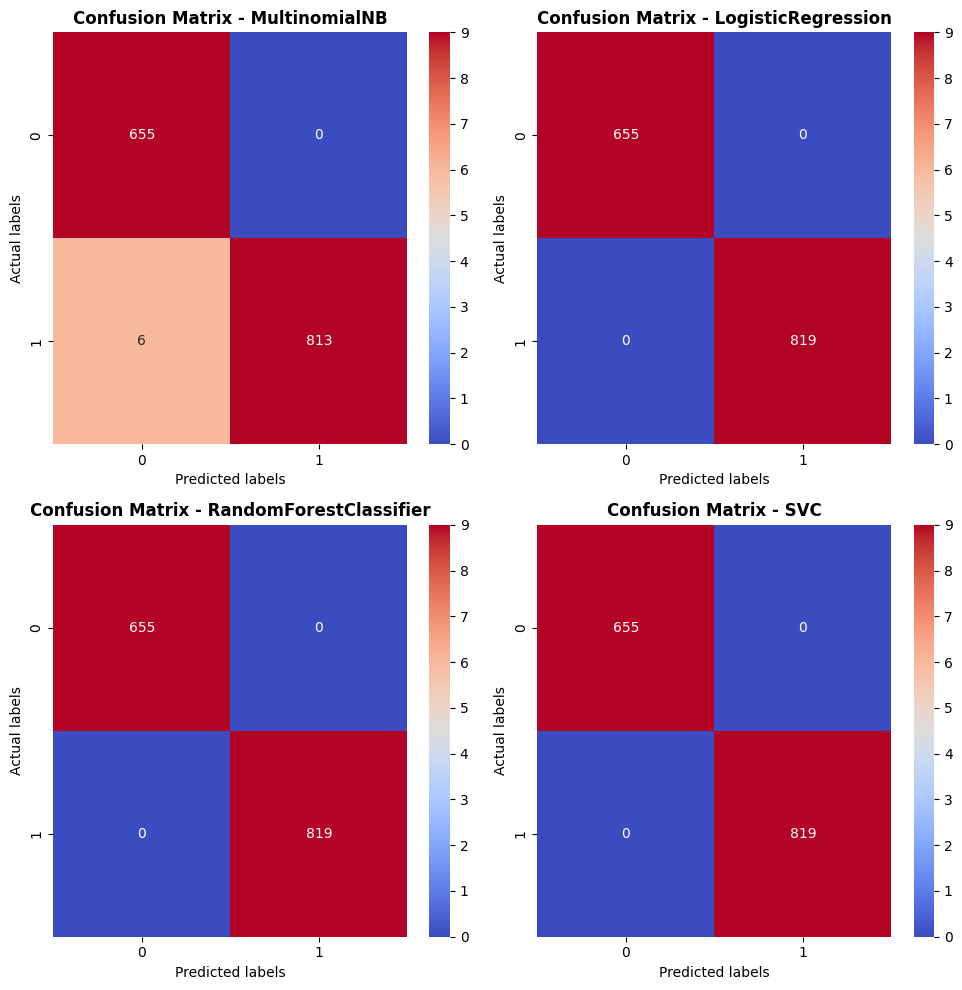

In [42]:
# Plotting confusion matrices for the different models
plt.figure(figsize=(10, 10))
for i, model in enumerate(param_grids.keys()):
    plt.subplot(2, 2, i + 1)
    model_name = model.__class__.__name__
    pvt_tbl = pd.crosstab(Doc_df["Actual_Label"], Doc_df[f'Predicted_Label_{model_name}'])
    plt.title(f"Confusion Matrix - {model_name}", fontsize=12, weight="bold")
    sns.heatmap(pvt_tbl, cmap='coolwarm', annot=True, fmt='.5g', vmin=0, vmax=9)
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')

plt.tight_layout()
plt.show()